# Data plotting

In [1]:
import numpy as np
from numpy import array, sqrt, exp, pi, log, mod
import matplotlib.pyplot as plt


In [2]:
with open("cs_res_500BS", "r") as file:
    cs_res = eval(file.read())
with open("rm2_res_500BS", "r") as file:
    rm2_res = eval(file.read())
    
np.random.seed(9527)
eps_list = [0.05,0.10,0.15,0.20]
BS = 500
n = 3
dpb = 5000
offset = 0.025
g_const = 0.05 + offset
f_ground_truth = {0.05: 0.9927205246651916, 0.1: 0.9429891695339357, 0.15: 0.8541454509095749, 0.2: 0.7241369035372355}

In [3]:
BS2 = 200
cs_sbs = {}
rm_sbs = {}
for eps in eps_list:
    print(eps)
    cs_sbs[eps] = []
    rm_sbs[eps] = []
    for _bs in range(BS2):
        ind_list = np.random.choice(BS,size=BS)
        cs_subsamp = [cs_res[eps][_k] for _k in ind_list]
        rm_subsamp = [rm2_res[eps][_k] for _k in ind_list]

        cs_sbs[eps].append(np.std(cs_subsamp))
        rm_sbs[eps].append(np.std(rm_subsamp))

    print("cs",np.mean(cs_sbs[eps]),np.std(cs_sbs[eps]))
    print("rm",np.mean(rm_sbs[eps]),np.std(rm_sbs[eps]))
    


0.05
cs 0.016186107576259358 0.0004851068808492512
rm 0.0024621880861759164 8.081427469450452e-05
0.1
cs 0.015737017162244817 0.0005072730120187343
rm 0.005921061300675625 0.0001893313164780873
0.15
cs 0.017322033874769955 0.0005474672589081942
rm 0.009415261159410155 0.00031089050333266187
0.2
cs 0.016594203532353663 0.00046944224351472887
rm 0.011773231174967655 0.0003908365747476238


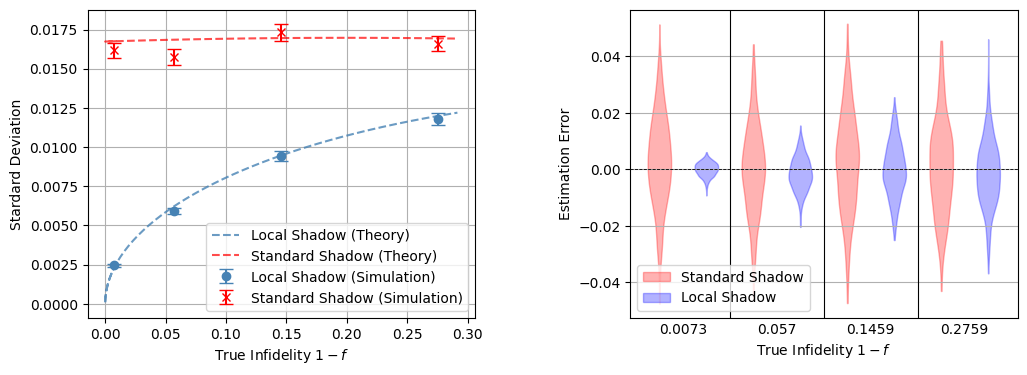

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
d = 1<<n

F = abs(sqrt((1-g_const*3)*(1-g_const*3-3*(array(eps_list)-offset))) + 3* sqrt(g_const*(g_const+array(eps_list)-offset)) )**2

eps_conti = np.linspace(0,0.205)
F_conti = abs(sqrt((1-g_const*3)*(1-g_const*3-3*(array(eps_conti)-offset))) + 3* sqrt(g_const*(g_const+array(eps_conti)-offset)) )**2


all_data = []
labels = []
for eps in eps_list:
    all_data.append(cs_res[eps] - f_ground_truth[eps])
    all_data.append(rm2_res[eps] - f_ground_truth[eps])
# plot violin plot
parts = axs[1].violinplot(all_data,showextrema=False)
cnt = 0
for pc in parts['bodies']:
    if mod(cnt,2)==0:
        pc.set_color("red")
        if cnt<2:
            pc.set_label("Standard Shadow")
    else:
        pc.set_color("blue")
        if cnt<2:
            pc.set_label("Local Shadow")
    cnt+=1

myxtickslabel = []
for f in F:
    myxtickslabel.append("1-f = "+str(np.round(1-f,4)))
# print(myxtickslabel)
    
axs[1].set_xticks([1.5,3.5,5.5,7.5])
# axs[1].set_xticklabels(myxtickslabel)
axs[1].set_xticklabels(np.round(1-F,4))
axs[1].set_ylabel('Estimation Error')
axs[1].set_xlabel(r'True Infidelity $1-f$')
axs[1].yaxis.grid(True)

for x in [2.5,4.5,6.5]:
    axs[1].axvline(x=x, color='black', linewidth=0.8,linestyle='-')  
axs[1].axhline(y=0.0, color='black', linewidth=0.6,linestyle='--')  

axs[1].tick_params(axis='x', which='both', length=0)
axs[1].legend(loc=3)

axs[0].errorbar(x = 1-F, y = [np.mean(rm_sbs[eps]) for eps in eps_list], yerr = [(np.std(rm_sbs[eps])) for eps in eps_list]  ,linestyle="None",marker='o' , capsize=5 ,color='#4682B4', label="Local Shadow (Simulation)")

axs[0].errorbar(x = 1-F, y = [np.mean(cs_sbs[eps]) for eps in eps_list], yerr = [(np.std(cs_sbs[eps])) for eps in eps_list] ,linestyle="None" ,marker='x', color = 'red',capsize=5 , label="Standard Shadow (Simulation)")



axs[0].plot(1-F_conti,sqrt((4 *(d+1)/(d+2) * F_conti*(1-F_conti))/dpb),'--',color='#4682B4',alpha=0.8,label="Local Shadow (Theory)")
axs[0].plot(1-F_conti,sqrt((2 *(d+1)*(1+2*F_conti)/(d+2) - (1+F_conti)**2)/dpb),'--',color='red',alpha=0.7,label="Standard Shadow (Theory)")



axs[0].set_xlabel(r'True Infidelity $1-f$')
axs[0].set_ylabel(r"Stardard Deviation")
axs[0].legend()
axs[0].grid()

plt.savefig('numerics.png')